<a href="https://colab.research.google.com/github/PepiMartin28/Proyecto-Nations/blob/main/Nations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Trabajaremos con el dataset 'nations', el cual contiene información sobre diferentes atributos de desarrollo humano en 194 países, recolectados por las Naciones Unidas.

* Contiene información a nivel mundial sobre demografía:
    * `country`: País.
    * `region`: Continente del país.
    * `gdp`: Producto Interno Bruto per cápita, precios 2005.
    * `school`: Promedio años de escolaridad.
    * `adfert`: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
    * `chldmort`: Probabilidad de muerte antes de los 5 años por cada 1000.
    * `life`: Esperanza de vida al nacer.
    * `pop`: Población total.
    * `urban`: Porcentaje de población urbana.
    * `femlab`: Tasa entre hombres y mujeres en el mercado laboral.
    * `literacy`: Tasa de alfabetismo.
    * `co2`: Toneladas de Co2 emitidas per cápita.
    * `gini`: Coeficiente de desigualdad del ingreso.

In [2]:
df_nations = pd.read_csv("https://raw.githubusercontent.com/DireccionAcademicaADL/Nations-DB/main/nations.csv", encoding="ISO-8859-1")

In [6]:
df_nations.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


Limpiamos el dataset quitando la columna "Unnamed: 0" que no aporta nada y la columna "gini" ya que mas de la mitad de los valores son nulos

In [7]:
df_nations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  194 non-null    int64  
 1   country     194 non-null    object 
 2   region      194 non-null    object 
 3   gdp         179 non-null    float64
 4   school      188 non-null    float64
 5   adfert      194 non-null    float64
 6   chldmort    193 non-null    float64
 7   life        194 non-null    float64
 8   pop         194 non-null    int64  
 9   urban       194 non-null    float64
 10  femlab      177 non-null    float64
 11  literacy    135 non-null    float64
 12  co2         185 non-null    float64
 13  gini        81 non-null     float64
dtypes: float64(10), int64(2), object(2)
memory usage: 21.3+ KB


In [8]:
df_nations.drop(['Unnamed: 0','gini'],axis=1, inplace = True)

In [10]:
df_nations.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1


Cambiamos la columna de población a población(millones).

In [18]:
df_nations['pop(millions)'] = df_nations['pop']/1000000

In [22]:
df_nations.drop(columns=['pop'], inplace=True)

In [23]:
df_nations.head()

,country,region,gdp,school,adfert,chldmort,life,urban,femlab,literacy,co2,pop(millions)
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,64.933334,0.4522,72.599998,15.0,34.172236
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,41.000000,0.8482,41.700001,1.2,8.237634
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,59.250000,0.8870,84.099998,9.2,1.941233
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,23.583334,0.8584,23.600000,0.2,15.308383
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,10.250000,1.0344,66.599998,0.1,7.821783


##A continuación realizamos un analisis de los datos del dataframe.

In [24]:
df_nations.describe()

,gdp,school,adfert,chldmort,life,urban,femlab,literacy,co2,pop(millions)
count,179.000000,188.000000,194.000000,193.000000,194.000000,194.000000,177.000000,135.000000,185.000000,194.000000
mean,12118.739193,7.459220,51.814433,47.650259,68.729295,55.434880,0.691606,81.533148,17.885946,34.377523
std,13942.341217,2.959589,44.066120,52.809400,10.055404,23.439101,0.182871,19.466359,25.670704,131.400366
min,279.799988,1.150000,1.000000,2.250000,45.849998,10.250000,0.194200,23.600000,0.100000,0.009767
25%,2100.300049,5.225000,16.500000,10.250000,63.745833,36.325000,0.578200,70.099998,2.250000,1.483754
50%,6932.799805,7.950000,39.350000,24.000000,72.183331,56.475000,0.730400,89.699997,8.450000,6.784909
75%,17576.299805,9.850000,74.375002,69.750000,75.545835,73.483334,0.820600,97.699997,25.000000,22.255316
max,74906.000000,12.700000,207.100006,209.000000,82.766663,100.000000,1.034400,100.000000,210.649994,1324.696064


Vemos la cantidad de datos que tenemos por región.

In [25]:
df_nations.groupby('region').count()

,country,gdp,school,adfert,chldmort,life,urban,femlab,literacy,co2,pop(millions)
region,,,,,,,,,,,
Africa,52,50,51,52,52,52,52,51,47,51,52
Americas,35,33,35,35,35,35,35,31,20,35,35
Asia,49,46,48,49,48,49,49,49,41,49,49
Europe,43,39,41,43,43,43,43,37,22,37,43
Oceania,15,11,13,15,15,15,15,9,5,13,15


Vemos el top 10 de países con mayor esperanza de vida y el top 10 de lo países con menor esperanza de vida.

In [26]:
df_nations.sort_values('life', ascending=False).head(10)

,country,region,gdp,school,adfert,chldmort,life,urban,femlab,literacy,co2,pop(millions)
104,Japan,Asia,30778.000000,11.416667,5.0,3.50,82.766663,66.366669,0.6628,NaN,37.199997,126.500896
176,Switzerland,Europe,37105.800781,10.866667,4.6,4.75,81.783333,73.433334,0.8032,NaN,20.500000,7.543950
162,Monaco,Europe,NaN,NaN,1.6,4.00,81.733337,100.000000,NaN,NaN,NaN,0.035333
98,"Hong Kong, China",Asia,38669.800781,9.716666,3.2,NaN,81.699997,100.000000,0.7412,NaN,20.750000,6.913884
170,San Marino,Europe,NaN,NaN,2.5,2.25,81.449997,94.050003,NaN,NaN,NaN,0.031017
180,Australia,Oceania,33707.199219,11.983334,16.5,5.25,81.400002,88.666664,0.7994,NaN,66.199997,21.325382
152,Iceland,Europe,35593.800781,10.150000,14.6,3.00,81.333336,93.150002,0.8716,NaN,27.150002,0.308283
154,Italy,Europe,28042.400391,9.816667,6.7,4.00,81.333336,67.966667,0.6246,98.900002,29.500000,59.656584
148,France,Europe,30162.199219,10.233334,7.2,4.25,80.883331,83.500000,0.8104,NaN,23.299999,61.908300
175,Sweden,Europe,33621.398438,11.700000,6.0,3.25,80.883331,84.483337,0.8748,NaN,20.750000,9.201517


In [27]:
df_nations.sort_values('life', ascending=True).head(10)

,country,region,gdp,school,adfert,chldmort,life,urban,femlab,literacy,co2,pop(millions)
24,Lesotho,Africa,1284.400024,5.583333,73.500000,98.25,45.849998,25.066666,0.8990,89.699997,NaN,2.117567
7,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,38.466667,0.8222,55.200001,0.20,4.203917
41,Sierra Leone,Africa,698.200012,2.733333,143.699997,202.50,46.000000,37.566666,0.9760,40.900002,0.65,5.529667
50,Zambia,Africa,1211.599976,6.400000,146.800003,147.75,46.599998,35.316666,0.7628,70.900002,0.80,12.243300
51,Zimbabwe,Africa,NaN,6.950000,64.599998,96.00,46.750000,37.066666,0.8120,91.900002,3.15,12.513100
22,Guinea-Bissau,Africa,967.599976,2.300000,111.099998,197.50,46.866669,29.766666,0.7114,52.200001,0.60,1.440083
45,Swaziland,Africa,4468.799805,6.850000,83.900002,85.75,47.116669,21.600000,0.6900,86.900002,3.30,1.143367
87,Afghanistan,Asia,938.400024,2.950000,118.699997,203.00,47.400002,21.916666,0.3858,NaN,0.10,29.501834
11,Congo (Dem Rep),Africa,279.799988,3.416667,201.399994,199.00,47.516666,33.633331,0.6552,66.800003,0.10,61.654348
8,Chad,Africa,1266.199951,1.500000,164.500000,209.00,48.566666,26.400000,0.8006,33.599998,0.10,10.509983


Vemos los paises que tienen indices de CO2 mayores a la media

In [28]:
df_nations[df_nations['co2'] > df_nations['co2'].mean()]

,country,region,gdp,school,adfert,chldmort,life,urban,femlab,literacy,co2,pop(millions)
15,Equatorial Guinea,Africa,27645.800781,5.400000,122.900002,149.50,50.066666,39.266666,0.4140,93.300003,32.550003,0.653533
26,Libya,Africa,14497.799805,6.816667,3.200000,19.75,74.016663,77.433334,0.3096,88.900002,33.849998,6.075651
40,Seychelles,Africa,18625.800781,9.400000,51.299999,12.75,72.983330,54.066666,NaN,91.800003,30.799999,0.085167
43,South Africa,Africa,9175.400391,8.350000,59.200001,68.75,51.433334,60.483334,0.7406,NaN,31.400000,49.028316
52,Antigua and Barbuda,Americas,17676.400391,8.900000,55.500000,13.00,72.166664,30.466667,NaN,99.000000,18.299999,0.086367
...,...,...,...,...,...,...,...,...,...,...,...,...
178,United Kingdom,Europe,33295.800781,9.066667,29.600000,6.00,79.550003,79.316666,0.7916,NaN,34.099998,61.099184
180,Australia,Oceania,33707.199219,11.983334,16.500000,5.25,81.400002,88.666664,0.7994,NaN,66.199997,21.325382
185,Nauru,Oceania,NaN,NaN,31.200001,45.50,79.466667,100.000000,NaN,NaN,51.849998,0.010183
186,New Zealand,Oceania,25199.599609,12.366667,30.900000,6.25,80.083336,86.133331,0.8118,NaN,26.950001,4.253334


Veamos un promedio de todas las columnas por cada región.

In [30]:
df_nations.groupby('region')[['gdp', 'school', 'adfert', 'chldmort', 'life', 'pop(millions)', 'urban', 'femlab', 'literacy', 'co2']].mean()

,gdp,school,adfert,chldmort,life,pop(millions),urban,femlab,literacy,co2
region,,,,,,,,,,
Africa,3699.900048,4.522876,92.721153,109.750000,56.490385,18.203903,40.724359,0.729910,65.308511,4.588235
Americas,10634.037894,8.072857,63.660000,23.264286,73.451428,25.858493,61.682857,0.650748,89.301250,14.940000
Asia,13676.823290,7.261111,33.865306,37.104167,70.872449,82.273936,55.464626,0.611314,87.357317,26.073469
Europe,23463.466471,10.421545,15.537209,7.046512,76.945736,17.073890,70.055039,0.771632,98.177273,29.141892
Oceania,8102.454457,8.715385,44.993334,39.416667,69.584445,3.465938,49.844445,0.723422,81.980000,15.088461


Vamos a mostrar un grafico la relación que hay entre los años escolares y la tasa de alfabetismo

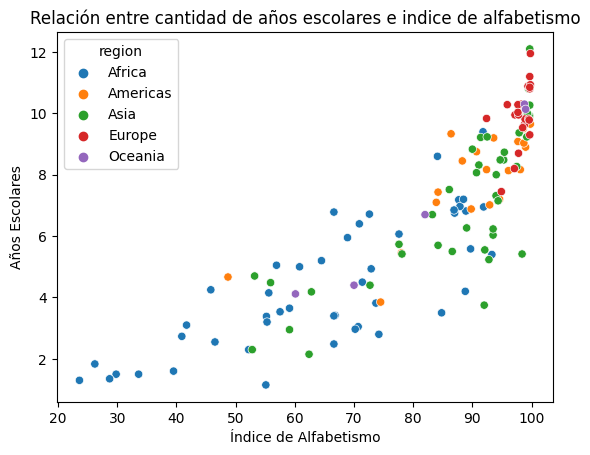

In [36]:
ax = sns.scatterplot(x='literacy', y='school', data = df_nations, hue="region")

ax.set_title('Relación entre cantidad de años escolares e indice de alfabetismo')

ax.set_xlabel('Índice de Alfabetismo')
ax.set_ylabel('Años Escolares')

plt.show()

Top 10 países con mayor población.

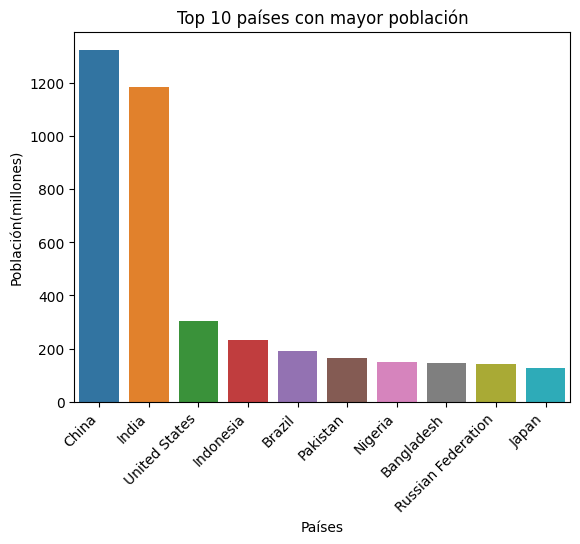

In [42]:
ax = sns.barplot(x='country', y='pop(millions)', data=df_nations.sort_values('pop(millions)', ascending=False).head(10))

ax.set_title('Top 10 países con mayor población')

ax.set_xlabel('Países')
ax.set_ylabel('Población(millones)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()